# **Data Jobs Salaries in February 2023 in Mexico** (Part 2)
____


Author: **Daniel Eduardo López**

**19/02/2023**

<a href="https://www.linkedin.com/in/daniel-eduardo-lopez"><font size="-1">LinkedIn</font></a> 

<a href="https://github.com/DanielEduardoLopez"><font size="-1">GitHub </font></a>

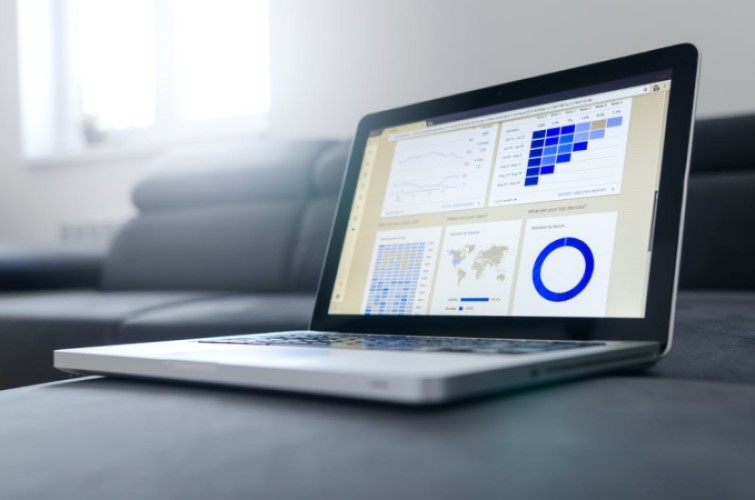

<font size="-1">Image Credit: <a href="https://www.pexels.com/es-es/foto/foto-de-primer-plano-del-portatil-gris-577210/"> Lukas </a></font>

___
## **1. Introduction**
___

With the emergence of the big data, new jobs have appeared demanding new sets of skills and expertise for extracting value from data (Axis Talent, 2020):

- Business Analysts (BA)
- Data Analysts (DA)
- Data Architects (DR) 
- Data Engineers (DE) 
- Data Scientists (DS)

Which one is the most valued in the Mexican labor market currently?

____
#### **General Objective**
To identify which data job category has the highest salary in the Mexican labor market in February 2023 according to the OCC website.
____
#### **Research Question**
Which data job category has the highest salary in the Mexican labor market in February 2023 according to the OCC website?
____
#### **Hypothesis**
The **Data Scientist** position has the highest salary in the Mexican labor market in February 2023 according to the OCC website.
____
#### **Abridged Methodology**
The methodology of the present study is based on Rollin’s Foundational Methodology for Data Science (Rollins, 2015).

1. **Analytical approach**: Descriptive and inferential statistics.
2. **Data requirements**: Data about job positions such as job name, salary, employer and location.
3. **Data collection**: Data was collected from the OCC Website (Mexico) on 07 February 2022, through web scraping with Python 3 and its libraries Selenium and BeautifulSoup.
4. **Data exploration and preparation**: Data then was explored and cleaned with Python 3 and its libraries Pandas and Numpy. 
5. **Data analysis**: Data was analyzed with Python 3 and its libraries Pandas, Scipy and Statsmodels and visualized with Matplotlib, Seaborn, Folium and Plotly. 
6. **Statistical analysis**: The D'Agostino-Pearson normality test was used to assess the normality of the data jobs salary distribution. Then, both parametric (ANOVA and t-test with unequal variance) and non-parametric (Mann-Whitney U and Kruskal-Wallis H) tests were carried out to assess the significance of the obtained results.

Furthermore:

7. A **dashboard** was built with Python 3 and its libraries Plotly and Dash.
8. A **final report** was written with the complete results obtained from the data.
9. Some **slides** were prepared with the **most important insights** from the report.

___
#### **Notebook's Goal**

In this context, the purpose of the present notebook is to perform the process of **data exploration, data preparation, data analysis, data visualization as well as the statistical analysis**.
___

In [1]:
# Loading Requirements Text File
#!pip install -r requirements.txt

In [2]:
# Libraries importation
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import scipy.stats as stats
import statsmodels.stats.diagnostic as std
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# Setting theme and plot resolution
sns.set_theme(context = 'notebook', style = 'darkgrid')
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["savefig.dpi"] = 300
set_matplotlib_formats('svg')

# Setting default plot's aesthetics
plotfontcolor = 'dimgray'
mpl.rcParams['text.color'] = plotfontcolor
mpl.rcParams['axes.labelcolor'] = plotfontcolor
mpl.rcParams['xtick.color'] = plotfontcolor
mpl.rcParams['ytick.color'] = plotfontcolor
mpl.rcParams["font.size"] = 10
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.titleweight"] = "bold"
#mpl.rcParams['font.family'] = 'sans-serif'
#mpl.rcParams['font.family'] = 'serif'

In [90]:
# Setting Heatmap Color Scale for Plotly
heatmap_px_colorscale = [(0, "#000000"), 
                        (0.03, px.colors.sequential.Blues[8]), 
                        (0.25, px.colors.sequential.Blues[6]), 
                        (0.5, px.colors.sequential.Blues[4]), 
                        (0.75, px.colors.sequential.Blues[2]), 
                        (1, "aliceblue")]

___
## **2. Data Exploration (EDA)**
___

Firstly, the data collected from the web scraping process was loaded to a Pandas dataframe. Then, the dataset was explored with the Pandas and Seaborn libraries to gain some understanding and preliminary insights.


In [4]:
# Data importation
df = pd.read_csv('https://raw.githubusercontent.com/DanielEduardoLopez/DataJobsMX2023/main/Dataset.csv')
df.head(10)

,Job,Salary,Company,Location
0,ANALISTA DE DATOS,Sueldo no mostrado por la empresa,NaN,"Cuautitlán Izcalli, Edo. Méx.​"
1,ANALISTA DE DATOS,Sueldo no mostrado por la empresa,Hitss,CDMX
2,Analista de Datos,"$20,000 - $25,000 Mensual",Aceros Levinson S.A. d...,"Monterrey, N.L."
3,Analista de datos (por incapacidad),"$17,000 - $18,000 Mensual",Sky,"Benito Juárez, CDMX"
4,Analista de Datos y Costos,"$15,000 - $18,000 Mensual",NaN,"San Miguel de Allende, Gto."
5,Analista de Datos Bussines Intelligence,Sueldo no mostrado por la empresa,Comercializadora de Va...,"Guadalajara, Jal."
6,Analista de datos maestros SAP,Sueldo no mostrado por la empresa,"Productos Verde Valle,...","Zapopan, Jal."
7,Analista base de datos,"$30,000 - $35,000 Mensual",Servicios TVM de Méxic...,"Miguel Hidalgo, CDMX"
8,Bases de Datos Analista,"$15,000 Mensual","Manpower, S.A. de C.V.","San Luis Potosí, SLP."
9,Analista de Base de Datos,"$15,000 - $16,000 Mensual",Grupo Daisa,"Cuauhtémoc, CDMX"


It can be observed that **data lacks consistency** in every variable. Some observations are in uppercase, some values are abbreviations, there is no salary value for each tuple, some observations do not correspond to data jobs, etc. Thus, it is necessary to clean the data. Nonetheless, some further exploration will be carried out to develop a more complete strategy for doing so.

In [5]:
# Basic dataset description
df.describe()

,Job,Salary,Company,Location
count,1292,1292,1061,1237
unique,899,249,439,181
top,Analista de Tecnología de Datos para Contac Ce...,Sueldo no mostrado por la empresa,"Manpower, S.A. de C.V.",CDMX
freq,12,655,46,289


All of the variables are strings. This is expectable for the **Job**, **Company**, and **Location** variables; but no for **Salary**, which must be appropriately wrangled.

In [6]:
# Basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job       1292 non-null   object
 1   Salary    1292 non-null   object
 2   Company   1061 non-null   object
 3   Location  1237 non-null   object
dtypes: object(4)
memory usage: 40.5+ KB


From the results above it can be seen that the variables **Job** and **Salary** do not exhibit null values, while **Company** and **Location** do. Indeed, in some cases the organization offering the vacancy prefers to remain confidential. 

In [7]:
# Value counts for each job position
df[['Job']].value_counts()

Job                                                     
Analista de Tecnología de Datos para Contac Center          12
Arquitecto de Datos                                         10
FCA (Fiat Chrysler) Plant Facilities Engineer Specialist    10
Analista en Prevención de Fraudes | Querétaro                9
Data engineer                                                9
                                                            ..
Auxiliar de supervisión académica                            1
Auxiliar de tráfico                                          1
Azure Data Engineer                                          1
BASE DE DATOS POSTGRETS                                      1
Customer Service - Order Entry Coordinator - EP              1
Length: 899, dtype: int64

932 different positions titles are present in the data set, while only 5 are required!

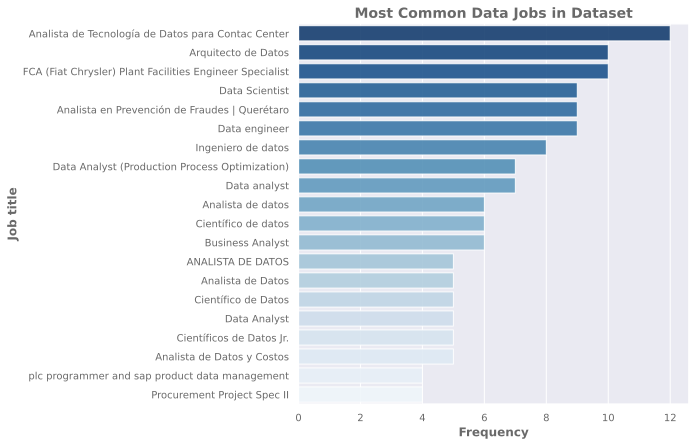

In [8]:
# Visual exploration of the Job variable (top 20)
fig, ax = plt.subplots(figsize = (7, 7))
sns.barplot(x = df['Job'].value_counts().values[0:20], y= df['Job'].value_counts().index[0:20], palette="Blues_r", alpha = 0.9)
plt.xlabel('Frequency')
plt.ylabel('Job title')
plt.title('Most Common Data Jobs in Dataset')
plt.show()

It appears that **_Analista de Tecnología de Datos para Contact Center_** is the most demanded position, followed by **_Arquitecto de datos_** and **_FCA (Fiat Chrysler) Plant Facilities Engineer Specialist_**.

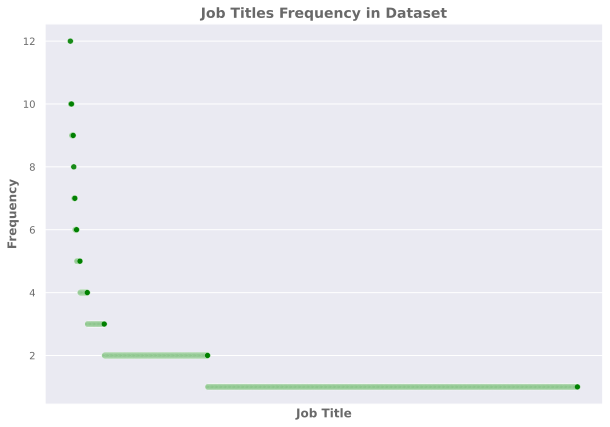

In [9]:
# Visual exploration of the Job variable
fig, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(x = df['Job'].unique(), y= df['Job'].value_counts(), color="Green", alpha = 0.9)
plt.xticks([])
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.title('Job Titles Frequency in Dataset')
plt.show()

The plot above shows that the largest part of the job titles retrieved from the web scraping are **unique values**. Thus, this suggests that the job titles variable is fairly inconsistent and/or it exhibits a lot of other positions which are not of interest for this study.

In [10]:
df['Location'].value_counts()

CDMX                                       289
Monterrey, N.L.                             95
Guadalajara, Jal.                           55
Miguel Hidalgo, CDMX                        51
Querétaro, Qro.                             33
                                          ... 
San José Iturbide, Gto.                      1
El Derramadero, Saltillo, Coah.              1
Tab.                                         1
Metepec, Edo. Méx.​                          1
Polanco V Sección, Miguel Hidalgo, CDMX      1
Name: Location, Length: 181, dtype: int64

**CDMX** is by far the location where most of the data jobs are demanded.

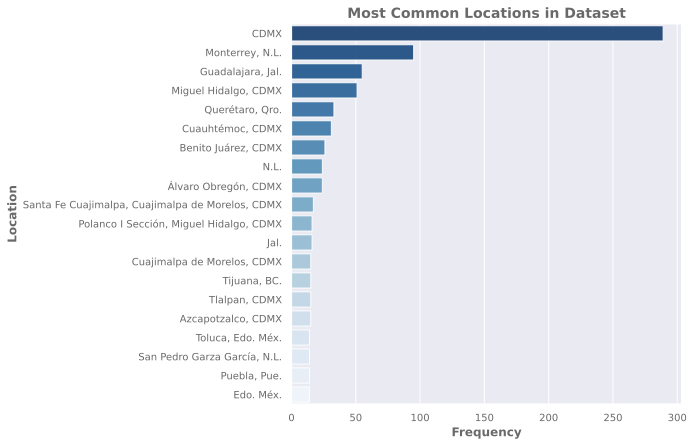

In [11]:
# Visual exploration of the Location variable (top 20)
fig, ax = plt.subplots(figsize = (7, 7))
sns.barplot(x = df['Location'].value_counts().values[0:20], y= df['Location'].value_counts().index[0:20], palette="Blues_r", alpha = 0.9)
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title('Most Common Locations in Dataset')
plt.show()

Some states appear with its full name and some with its abbreviation. In Furthermore, in some cases, only the name of the state appears while in others the name of the municipality is also included.

Notwithstanding with the above, it is clear that **CDMX (Mexico City)** is the location where **the most data jobs are demanded**.

In [12]:
# Value counts for each company
df['Company'].value_counts()

Manpower, S.A. de C.V.       46
SIEMENS SA DE CV             28
Grupo Salinas                25
Atento Servicios, S. A...    24
Softtek                      16
                             ..
Universidad Tecnologic...     1
SERVICIOS FULTRA SA DE...     1
JLL ENGINEERING SERVICES      1
Bayer de México               1
Eaton Corporation             1
Name: Company, Length: 439, dtype: int64

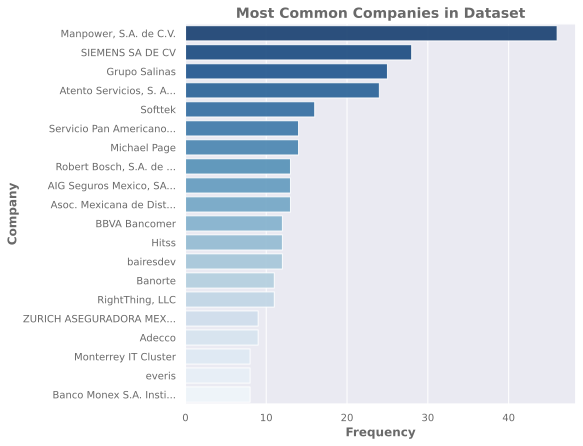

In [13]:
# Visual exploration of the Company variable (top 20)
fig, ax = plt.subplots(figsize = (7, 7))
sns.barplot(x = df['Company'].value_counts().values[0:20], y= df['Company'].value_counts().index[0:20], palette="Blues_r", alpha = 0.9)
plt.xlabel('Frequency')
plt.ylabel('Company')
plt.title('Most Common Companies in Dataset')
plt.show()

**_Manpower_** is the company with **the highest number of data jobs vacancies**. It is followed by **_Siemens_**, **_Grupo Salinas_** and **_Atento Servicios_**.

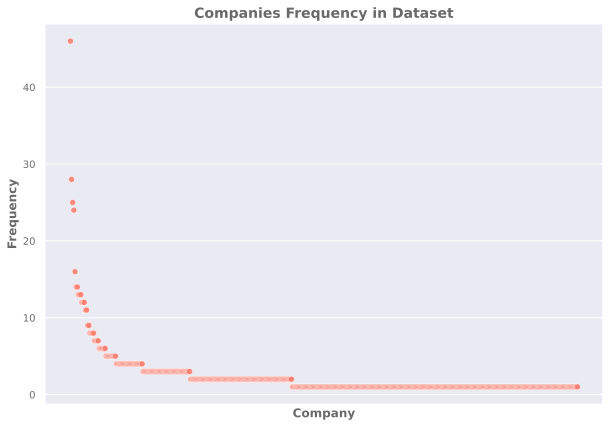

In [14]:
# Visual exploration of the Company variable
fig, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(x = df['Company'].value_counts().index, y= df['Company'].value_counts().values, color="Salmon", alpha = 0.9)
plt.xticks([])
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.title('Companies Frequency in Dataset')
plt.show()

The plot above shows that most companies only offer **one or two** data-related positions.

In [15]:
# Value counts for each Salary
df['Salary'].value_counts()

Sueldo no mostrado por la empresa    655
$15,000  Mensual                      30
$20,000 - $25,000  Mensual            24
$7,600 - $9,000  Mensual              12
$15,000 - $18,000  Mensual            12
                                    ... 
$35,000 - $36,000  Mensual             1
$80,000 - $95,000  Mensual             1
$63,000 - $64,000  Mensual             1
$80,000 - $85,000  Mensual             1
$15,000 - $15,500  Mensual             1
Name: Salary, Length: 249, dtype: int64

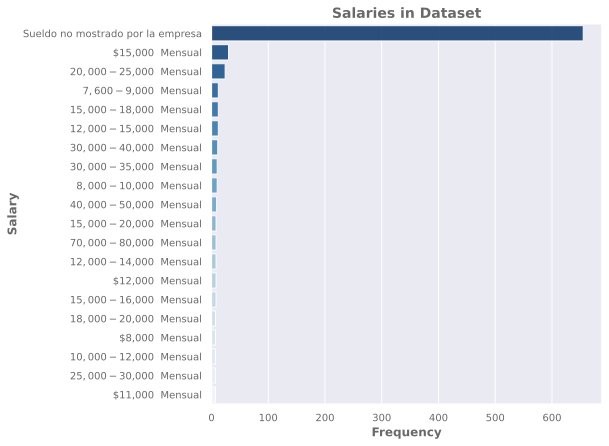

In [16]:
# Visual exploration of the Company variable (top 20)
fig, ax = plt.subplots(figsize = (7, 7))
sns.barplot(x = df['Salary'].value_counts().values[0:20], y= df['Salary'].value_counts().index[0:20], palette="Blues_r", alpha = 0.9)
plt.xlabel('Frequency')
plt.ylabel('Salary')
plt.title('Salaries in Dataset')
plt.show()

Obviously, is necessary to clean the data in order to get more meaningful insights regarding the salary. However, it is noteworthy that most of the published vacancies have an undisclosed salary.

For the vacancies that have a disclosed salary, a salary range is most commonly published rather than a single value.

Of course, the periodicity of the payment (_"Mensual"_: monthly) must be removed from all observations.

On the other hand, it "appears" that a salary of about **15,000 MXN** is the most common, which is probably not accurate due to the fact that the salary variable is a string instead of an actual number.

___
## **3. Data Preparation**
___


After the data was explored, some wrangling strategies to effectively clean the data were defined. In this sense, some of the procedures applied to the data were:
- Drop of duplicates
- Drop of null values
- Harmonization of terms
- Trimming and cleaning of values
- Slicing of observations
- Split of columns

From the raw data obtained through web scraping, it has been noticed that much of the vacancies published lack of true salary data. However, those positions without said data might be useful for assessing the geographical distribution of the data jobs in Mexico as well as identiying which companies demand more data specialists even if they have not published a proposed salary.

In [17]:
# Drop of duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 0 to 1290
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job       1021 non-null   object
 1   Salary    1021 non-null   object
 2   Company   850 non-null    object
 3   Location  974 non-null    object
dtypes: object(4)
memory usage: 39.9+ KB


#### **Cleaning of the variable _Job_**

This section shows the process carried out to harmonize the job titles of the data-related positions and the drop of non data-related jobs.

To do so, a data jobs dictionary using keys in both English and Spanish was defined. If a certain vacancy comprised all the terms in the keys, then, the job title was renamed to a standard job title.

In [18]:
# Creating job dictionary
job_dict = {
    ('data', 'analyst'): "Data Analyst",
    ('analista', 'datos'): "Data Analyst",

    ('data', 'scientist'): "Data Scientist",
    ('científico', 'datos'): "Data Scientist",
    ('cientifico', 'datos'): "Data Scientist",

    ('data', 'engineer'): "Data Engineer",
    ('ingeniero', 'datos'): "Data Engineer",

    ('business', 'analyst'): "Business Analyst",
    ('analista', 'negocio'): "Business Analyst",
    
    ('data', 'architect'): "Data Architect",
    ('arquitecto', 'datos'): "Data Architect"
}

In [19]:
# Proof of concept
list(job_dict.keys())[0][0] in 'data analyst' and list(job_dict.keys())[0][1] in 'data analyst'

True

In [20]:
# Conversion of job observations to lower case
df['Job'] = df['Job'].str.casefold()

In [21]:
# Cleaning of the variable Job
for i in range(len(job_dict)):
    df['Job'] = df['Job'].map(lambda x: list(job_dict.values())[i] if (list(job_dict.keys())[i][0] in x and list(job_dict.keys())[i][1] in x) else x)

df.head(10)

,Job,Salary,Company,Location
0,Data Analyst,Sueldo no mostrado por la empresa,NaN,"Cuautitlán Izcalli, Edo. Méx.​"
1,Data Analyst,Sueldo no mostrado por la empresa,Hitss,CDMX
2,Data Analyst,"$20,000 - $25,000 Mensual",Aceros Levinson S.A. d...,"Monterrey, N.L."
3,Data Analyst,"$17,000 - $18,000 Mensual",Sky,"Benito Juárez, CDMX"
4,Data Analyst,"$15,000 - $18,000 Mensual",NaN,"San Miguel de Allende, Gto."
5,Data Analyst,Sueldo no mostrado por la empresa,Comercializadora de Va...,"Guadalajara, Jal."
6,Data Analyst,Sueldo no mostrado por la empresa,"Productos Verde Valle,...","Zapopan, Jal."
7,Data Analyst,"$30,000 - $35,000 Mensual",Servicios TVM de Méxic...,"Miguel Hidalgo, CDMX"
8,Data Analyst,"$15,000 Mensual","Manpower, S.A. de C.V.","San Luis Potosí, SLP."
9,Data Analyst,"$15,000 - $16,000 Mensual",Grupo Daisa,"Cuauhtémoc, CDMX"


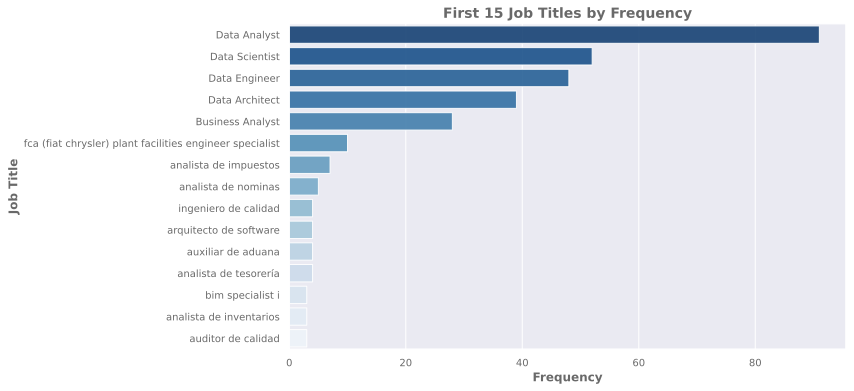

In [22]:
# Visual exploration of the pre-cleaned Job variable (first 15 positions)
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(x = df['Job'].value_counts()[:15], y= df['Job'].value_counts().keys()[:15], palette="Blues_r", alpha = 0.9)
plt.title('First 15 Job Titles by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()

In the plot above it is possible to observe:
1. The job titles for the data-related positions have been successfully harmonized and they conform the majority of the observations in the dataset
2. Along with the data positions, there is significant number of other non data-related positions. So, the latter will be removed from the dataset.

In [23]:
# Drop of observations not corresponding to Data Jobs
df = df.loc[(df['Job'] == 'Data Analyst') | (df['Job'] == 'Business Analyst') | (df['Job'] == 'Data Engineer') | (df['Job'] == 'Data Scientist') | (df['Job'] == 'Data Architect')]
df['Job'].value_counts()

Data Analyst        91
Data Scientist      52
Data Engineer       48
Data Architect      39
Business Analyst    28
Name: Job, dtype: int64

In [24]:
# Resulting number of observations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 1220
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job       258 non-null    object
 1   Salary    258 non-null    object
 2   Company   217 non-null    object
 3   Location  239 non-null    object
dtypes: object(4)
memory usage: 10.1+ KB


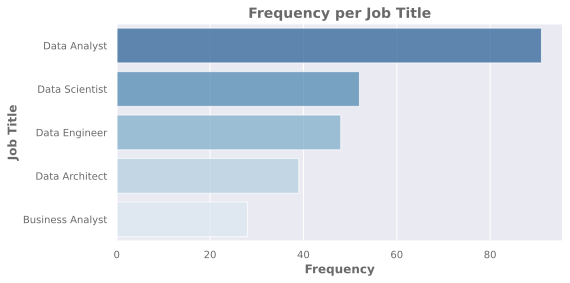

In [25]:
# Visual exploration of the cleaned Job variable (first 15 positions)
fig, ax = plt.subplots(figsize = (8, 4))
sns.barplot(x = df['Job'].value_counts()[:15], y= df['Job'].value_counts().keys()[:15], palette="Blues_r", alpha = 0.7)
plt.title('Frequency per Job Title')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()

From the plot above, it is possible to see that the variable **Job**  has been successfully cleaned as data-related jobs are the only observations in the data set and their job titles are consistent. It is also noteworthy that the **_Data Analyst_** is the most demanded position in February 2023.

#### **Cleaning of the variable _Company_**

This section shows the process carried out to replace the null values for a string legend of "Not Disclosed" and to provide consistency to the letter case in the company names of the retrieved data.

In [26]:
# Cleaning of the Company variable
df['Company'] = df['Company'].apply(lambda x: "Not Disclosed" if pd.isnull(x) else x)
df['Company'] = df['Company'].apply(lambda x: str.title(str(x)))
df.head(10)

,Job,Salary,Company,Location
0,Data Analyst,Sueldo no mostrado por la empresa,Not Disclosed,"Cuautitlán Izcalli, Edo. Méx.​"
1,Data Analyst,Sueldo no mostrado por la empresa,Hitss,CDMX
2,Data Analyst,"$20,000 - $25,000 Mensual",Aceros Levinson S.A. D...,"Monterrey, N.L."
3,Data Analyst,"$17,000 - $18,000 Mensual",Sky,"Benito Juárez, CDMX"
4,Data Analyst,"$15,000 - $18,000 Mensual",Not Disclosed,"San Miguel de Allende, Gto."
5,Data Analyst,Sueldo no mostrado por la empresa,Comercializadora De Va...,"Guadalajara, Jal."
6,Data Analyst,Sueldo no mostrado por la empresa,"Productos Verde Valle,...","Zapopan, Jal."
7,Data Analyst,"$30,000 - $35,000 Mensual",Servicios Tvm De Méxic...,"Miguel Hidalgo, CDMX"
8,Data Analyst,"$15,000 Mensual","Manpower, S.A. De C.V.","San Luis Potosí, SLP."
9,Data Analyst,"$15,000 - $16,000 Mensual",Grupo Daisa,"Cuauhtémoc, CDMX"


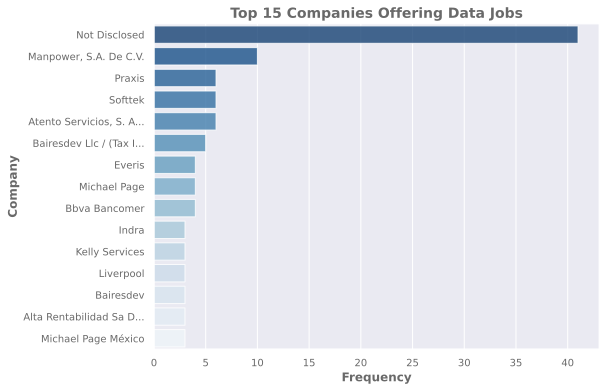

In [27]:
# Visual exploration of the cleaned Company variable
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(x = df['Company'].value_counts()[:15], y= df['Company'].value_counts().keys()[:15], palette="Blues_r", alpha = 0.8)
plt.title('Top 15 Companies Offering Data Jobs')
plt.xlabel('Frequency')
plt.ylabel('Company')
plt.show()

The plot above suggests that the letter case of the different company names is now consistent. So, it is deemed that the variable **Company** has been successfully cleaned.

#### **Cleaning of the variable _Location_**

This section shows the process carried out to harmonize the name of the Mexican States in which the data-related positions are demanded.

To do so, firstly, the state component was extracted from the location data.

In [28]:
# Extraction of the state from the location data
df['Location'] = df['Location'].apply(lambda x: "Not Disclosed" if pd.isnull(x) else x)
df['Location'] = df['Location'].apply(lambda x: str(x).split(",")[-1] if len(str(x).split(",")) > 1 else x)
df['Location'] = df['Location'].apply(lambda x: str(x.replace('\u200b', ' ')).strip())
df.head(10)

,Job,Salary,Company,Location
0,Data Analyst,Sueldo no mostrado por la empresa,Not Disclosed,Edo. Méx.
1,Data Analyst,Sueldo no mostrado por la empresa,Hitss,CDMX
2,Data Analyst,"$20,000 - $25,000 Mensual",Aceros Levinson S.A. D...,N.L.
3,Data Analyst,"$17,000 - $18,000 Mensual",Sky,CDMX
4,Data Analyst,"$15,000 - $18,000 Mensual",Not Disclosed,Gto.
5,Data Analyst,Sueldo no mostrado por la empresa,Comercializadora De Va...,Jal.
6,Data Analyst,Sueldo no mostrado por la empresa,"Productos Verde Valle,...",Jal.
7,Data Analyst,"$30,000 - $35,000 Mensual",Servicios Tvm De Méxic...,CDMX
8,Data Analyst,"$15,000 Mensual","Manpower, S.A. De C.V.",SLP.
9,Data Analyst,"$15,000 - $16,000 Mensual",Grupo Daisa,CDMX


Then, a dictionary was defined using the abbreviations in the keys and the full state names in the values. After that, the dictionary was passed to the data in order to replace the abbreviations by the full state names.

In [29]:
# Dictionary with the retrieved Location values
location_dict = {
    'CDMX': 'Ciudad de México',
    'Chih.': 'Chihuahua',
    'Edo. Méx.': 'Estado de México',
    'Gto.': 'Guanajuato',
    'Jal.': 'Jalisco',
    'Q. Roo': 'Quintana Roo',
    'N. L.': 'Nuevo León',
    'N.L.': 'Nuevo León',
    'Pue.': 'Puebla',
    'México': 'Estado de México',
    'Zac.': 'Zacatecas',
    'Tamps.': 'Tamaulipas',
    'Mor.': 'Morelos',
    'Sin.': 'Sinaloa',
    'Oax.': 'Oaxaca',
    'Qro.': 'Querétaro',
    'Mich.': 'Michoacán',
    'Son.': 'Sonora',
    'BC.': 'Baja California',
    'SLP.': 'San Luis Potosí',
    'Yuc.': 'Yucatán',
    'Coah.': 'Coahuila',
    'BCS.': 'Baja California Sur',
    'Nay.': 'Nayarit',
    'Ags.': 'Aguascalientes',
    'Hgo.': 'Hidalgo',
    'Chis.': 'Chiapas',
    }

In [30]:
# Cleaning of the Location variable in the dataset
for i in range(len(location_dict)):
  df['Location'] = df['Location'].apply(lambda x: list(location_dict.values())[i] if x == list(location_dict.keys())[i] else x)

df.head(10)

,Job,Salary,Company,Location
0,Data Analyst,Sueldo no mostrado por la empresa,Not Disclosed,Estado de México
1,Data Analyst,Sueldo no mostrado por la empresa,Hitss,Ciudad de México
2,Data Analyst,"$20,000 - $25,000 Mensual",Aceros Levinson S.A. D...,Nuevo León
3,Data Analyst,"$17,000 - $18,000 Mensual",Sky,Ciudad de México
4,Data Analyst,"$15,000 - $18,000 Mensual",Not Disclosed,Guanajuato
5,Data Analyst,Sueldo no mostrado por la empresa,Comercializadora De Va...,Jalisco
6,Data Analyst,Sueldo no mostrado por la empresa,"Productos Verde Valle,...",Jalisco
7,Data Analyst,"$30,000 - $35,000 Mensual",Servicios Tvm De Méxic...,Ciudad de México
8,Data Analyst,"$15,000 Mensual","Manpower, S.A. De C.V.",San Luis Potosí
9,Data Analyst,"$15,000 - $16,000 Mensual",Grupo Daisa,Ciudad de México


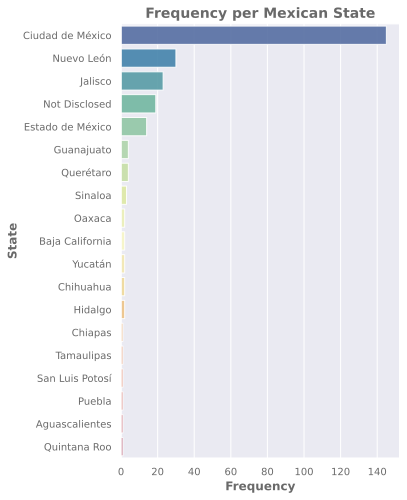

In [31]:
# Visual exploration of the cleaned Location variable
fig, ax = plt.subplots(figsize = (5, 8))
sns.barplot(x = df['Location'].value_counts().values, y= df['Location'].value_counts().index, palette="Spectral_r", alpha = 0.9)
plt.title('Frequency per Mexican State')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()

The plot above shows that the names of the Mexican states where the data job vacancies are demanded is now consistent. So, the variable **Location** has been successfully cleaned.

#### **Cleaning of the variable _Salary_**

This section shows the process carried out to wrangle and clean the salary data. To do so, the salary observations were cleaned from useless characters, then, the salary ranges were splitted into two columns and a average salary was calculated when applicable. Finally, non useful Salary columns were dropped.

In [32]:
# Checking if all the Salary observations are disclosed in a monthly basis
df[df['Salary'].apply(lambda x: True if ('Mensual' not in str(x)) and (x is not np.nan) else False) & (df['Salary'] != 'Sueldo no mostrado por la empresa')]

,Job,Salary,Company,Location


Thus, all of the observations correspond to monthly salaries.

In [33]:
# Replacing the wording of the positions without disclosed salaries with the legend "Not Disclosed"
df['Salary'] = df['Salary'].apply(lambda x: 'Not Disclosed' if x == 'Sueldo no mostrado por la empresa' else x)
df.head()

,Job,Salary,Company,Location
0,Data Analyst,Not Disclosed,Not Disclosed,Estado de México
1,Data Analyst,Not Disclosed,Hitss,Ciudad de México
2,Data Analyst,"$20,000 - $25,000 Mensual",Aceros Levinson S.A. D...,Nuevo León
3,Data Analyst,"$17,000 - $18,000 Mensual",Sky,Ciudad de México
4,Data Analyst,"$15,000 - $18,000 Mensual",Not Disclosed,Guanajuato


In [34]:
# Removing useless characters from column values
char_remove = {
                'Anual': '',
                'Mensual': '',
                '$': '',
                ',': ''}

for key, value in char_remove.items():
    df['Salary'] = df['Salary'].str.replace(key, value).str.strip()

df.head()

<ipython-input-34-efe8f30cb4d3>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Salary'] = df['Salary'].str.replace(key, value).str.strip()


,Job,Salary,Company,Location
0,Data Analyst,Not Disclosed,Not Disclosed,Estado de México
1,Data Analyst,Not Disclosed,Hitss,Ciudad de México
2,Data Analyst,20000 - 25000,Aceros Levinson S.A. D...,Nuevo León
3,Data Analyst,17000 - 18000,Sky,Ciudad de México
4,Data Analyst,15000 - 18000,Not Disclosed,Guanajuato


In [35]:
# Splitting Salary column values into two columns
df['Salary'] = df['Salary'].apply(lambda x: np.nan if x == "Not Disclosed" else x)
df[['Min Salary', 'Max Salary']] = df['Salary'].str.split('-', 1, expand=True)
df['Min Salary'] = df['Min Salary'].str.strip().astype(np.float64)
df['Max Salary'] = df['Max Salary'].str.strip().astype(np.float64)
df.head()

,Job,Salary,Company,Location,Min Salary,Max Salary
0,Data Analyst,NaN,Not Disclosed,Estado de México,NaN,NaN
1,Data Analyst,NaN,Hitss,Ciudad de México,NaN,NaN
2,Data Analyst,20000 - 25000,Aceros Levinson S.A. D...,Nuevo León,20000.0,25000.0
3,Data Analyst,17000 - 18000,Sky,Ciudad de México,17000.0,18000.0
4,Data Analyst,15000 - 18000,Not Disclosed,Guanajuato,15000.0,18000.0


In [36]:
# Calculating average salary for each vacancy
df['Avg Salary'] = (df['Min Salary'] + df['Max Salary']) / 2
df.head()

,Job,Salary,Company,Location,Min Salary,Max Salary,Avg Salary
0,Data Analyst,NaN,Not Disclosed,Estado de México,NaN,NaN,NaN
1,Data Analyst,NaN,Hitss,Ciudad de México,NaN,NaN,NaN
2,Data Analyst,20000 - 25000,Aceros Levinson S.A. D...,Nuevo León,20000.0,25000.0,22500.0
3,Data Analyst,17000 - 18000,Sky,Ciudad de México,17000.0,18000.0,17500.0
4,Data Analyst,15000 - 18000,Not Disclosed,Guanajuato,15000.0,18000.0,16500.0


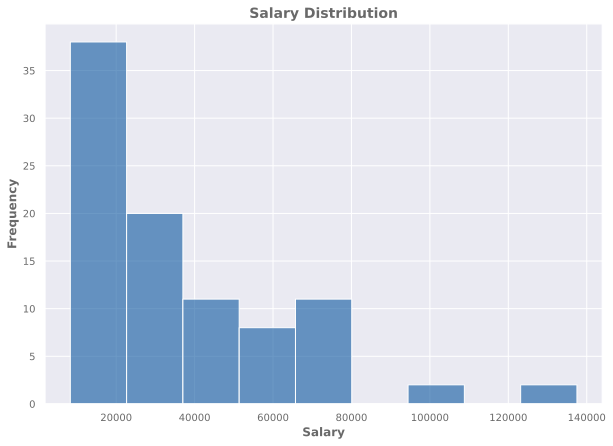

In [37]:
# Visual exploration of the cleaned Salary variable
fig, ax = plt.subplots(figsize = (10, 7))
sns.histplot(data= df['Avg Salary'], color = sns.color_palette('Blues_r')[0], alpha = 0.6)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

 The histogram above suggests that all Salary observations have been transformed from a range in a string format into actual numbers. So, it is considered that the variable **Salary** has been successfully cleaned. On the other hand, it is noteworthy that some observations fall well beyond the main salary distribution. Let's take a look into those observations.

In [38]:
# Exploring positions whose salary is more than $80,000 MXN per month
df[df['Avg Salary'] > 80000]

,Job,Salary,Company,Location,Min Salary,Max Salary,Avg Salary
701,Data Engineer,95000 - 105000,Not Disclosed,Ciudad de México,95000.0,105000.0,100000.0
794,Data Architect,95000 - 105000,Especialistas En Talen...,Ciudad de México,95000.0,105000.0,100000.0
805,Data Architect,135000 - 140000,"Manpower, S.A. De C.V.",Not Disclosed,135000.0,140000.0,137500.0
807,Data Architect,130000 - 145000,"Manpower, S.A. De C.V.",Ciudad de México,130000.0,145000.0,137500.0


From the above results, it is plausible that Data Engineer and Data Architect positions earns an extremely high salaries as the ones showed as such positions require advanced programming skills and expertise.

Finally, the original Salary column was dropped.

In [39]:
# Dropping of the original Salary column
df = df.drop(columns = ['Salary'])
df.head()

,Job,Company,Location,Min Salary,Max Salary,Avg Salary
0,Data Analyst,Not Disclosed,Estado de México,NaN,NaN,NaN
1,Data Analyst,Hitss,Ciudad de México,NaN,NaN,NaN
2,Data Analyst,Aceros Levinson S.A. D...,Nuevo León,20000.0,25000.0,22500.0
3,Data Analyst,Sky,Ciudad de México,17000.0,18000.0,17500.0
4,Data Analyst,Not Disclosed,Guanajuato,15000.0,18000.0,16500.0


In [40]:
df.describe()

,Min Salary,Max Salary,Avg Salary
count,105.000000,92.000000,92.000000
mean,33439.238095,39887.119565,37240.951087
std,24991.531477,28349.512533,27027.431744
min,7000.000000,9000.000000,8300.000000
25%,15000.000000,19500.000000,17500.000000
50%,28000.000000,31000.000000,30000.000000
75%,43000.000000,52750.000000,50375.000000
max,135000.000000,145000.000000,137500.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 1220
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Job         258 non-null    object 
 1   Company     258 non-null    object 
 2   Location    258 non-null    object 
 3   Min Salary  105 non-null    float64
 4   Max Salary  92 non-null     float64
 5   Avg Salary  92 non-null     float64
dtypes: float64(3), object(3)
memory usage: 14.1+ KB


It seems that some salary data is only in the *Min Salary* column (105 non-null vs. 92 non-null). Those observations correspond to the vacancies in which the published salary was not a range but a single value. Thus, said value was copied into the *Max Salary* and *Avg Salary* columns.

In [42]:
# Copying values from Min Salary column to the Max Salary and Avg Salary columns
for index, value in df['Min Salary'].iteritems():
  if pd.isnull(df['Max Salary'][index]) and pd.isnull(df['Avg Salary'][index]):
    df['Max Salary'][index] = value
    df['Avg Salary'][index] = value

df.head()

<ipython-input-42-1a55d367c8db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max Salary'][index] = value
<ipython-input-42-1a55d367c8db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg Salary'][index] = value


,Job,Company,Location,Min Salary,Max Salary,Avg Salary
0,Data Analyst,Not Disclosed,Estado de México,NaN,NaN,NaN
1,Data Analyst,Hitss,Ciudad de México,NaN,NaN,NaN
2,Data Analyst,Aceros Levinson S.A. D...,Nuevo León,20000.0,25000.0,22500.0
3,Data Analyst,Sky,Ciudad de México,17000.0,18000.0,17500.0
4,Data Analyst,Not Disclosed,Guanajuato,15000.0,18000.0,16500.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 1220
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Job         258 non-null    object 
 1   Company     258 non-null    object 
 2   Location    258 non-null    object 
 3   Min Salary  105 non-null    float64
 4   Max Salary  105 non-null    float64
 5   Avg Salary  105 non-null    float64
dtypes: float64(3), object(3)
memory usage: 22.2+ KB


So, the dataset has been successfully cleaned and prepared for the **Data Analysis & Visualization**.

#### **Exportation of the cleaned dataset**

This section shows the process for exporting the desired dataset.

In [44]:
# Exporting of the cleaned dataset
df.to_csv('Dataset_Clean.csv', index=False, encoding='utf-8')

___
## **4. Data Analysis & Visualization**
___

After the dataset was cleaned and prepared, the data was analyzed in order to answer the following questions:
- What is the Most Demanded Data Job?
- Where do the Most Data Jobs Locate?
- How is the Data Jobs Demand Per State?
- What are the Companies Demanding More Data Jobs?
- How is the Data Jobs Demand Per Company?
- Where Do the Companies Locate?
- Which Data Job Category Has the Highest Salaries?
- Where the Highest Salaries Can Be Found?
- What Companies Offer the Highest Salaries?
- What Companies Offer the Highest Salaries Per Data Job Category?

#### **What is the most demanded data job?**
To answer this question, a donut chart was plotted with Matplotlib and Plotly. 


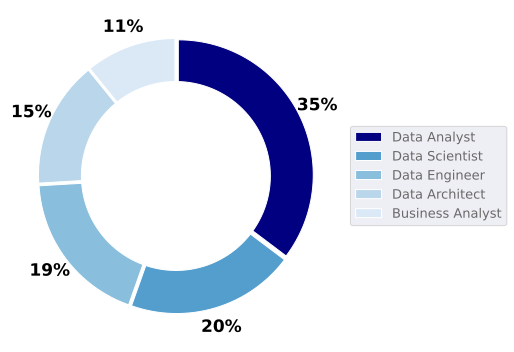

In [45]:
# Donut chart of the data jobs demand with Matplotlib
fig, ax = plt.subplots(figsize = (8, 13))
colors = sns.color_palette('Blues_r')
explode = [0.02] * 5
wedges, texts, autotexts = ax.pie(x = list(df['Job'].value_counts().values), wedgeprops=dict(edgecolor='w', linewidth= 1),
        textprops = dict(size=17, weight="bold", color = 'black'), colors = ['navy',colors[2],colors[3],colors[4],colors[5]], 
        autopct='%.0f%%', pctdistance=1.15, startangle = 90, counterclock = False, explode = explode)
center = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(center)
plt.legend(wedges, list(df['Job'].value_counts().keys()), fontsize=13, loc="center right", bbox_to_anchor=(1.2, 0, 0.3, 1))
plt.tight_layout()
plt.show()

In [46]:
# Configuration for exporting Plotly charts for publication
config = {
  'toImageButtonOptions': {
    'format': 'svg', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'scale': 2 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

In [102]:
# Donut chart of the data jobs demand with Plotly

job_df = pd.DataFrame(df['Job'].value_counts().reset_index().rename(columns = {'index': 'Job', 'Job': 'Count'}))

pie_colors = ['#06477D','#84BDEC','#B4D4EF', '#C8E4FC','aliceblue']

fig = px.pie(job_df, values='Count', names='Job', color = 'Job', hole = 0.7,  
                           color_discrete_sequence=px.colors.sequential.Blues_r,
                           height= 500,
                           width = 700,
                           title='Demand of Data Jobs Per Category')
fig.update_layout(title_x=0.5, font=dict(size=14))
fig.update_traces(hoverinfo='label+percent+name', textinfo='percent', textfont_size=18,
                    marker=dict(colors=pie_colors, line=dict(color='white', width=4)))
fig.show(config=config)

From the above plot, it is possible to conclude that more than a third of the data jobs (**35%**) correspond to positions of **Data Analyst**, rendering them as **the most demanded** ones in the Mexican labor market at the time of this study (February 2023). In second place, it is possible to found the positions of **Data Scientist** with about **20%** of the total. 

Furthermore, it is noteworthy that **Data Engineer** positions are more demanded than **Data Architect** positions with about **19%** and about **15%**, respectively. 

On the contrary, **Business Analyst** positions are the less demanded, with only about **11%** out of the total.


#### **Where do the Most Data Jobs Locate?**
To answer this question, a choropleth was prepared using Folium and Plotly.

First, to define the specific location of the markers in the Folium map, a dictionary was defined with the corresponding ID, Latitude and Longitude of the capital cities for each Mexican State.

The IDs correspond to the IDs of the <a href="https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json">file with the geographical data</a>.

Then, the dictionary was converted into a pandas dataframe.

In [48]:
# Mexican states dictionary with corresponding ID, Latitude and Longitude

states_dict = {'Aguascalientes': ('AS', 21.87945992,	-102.2904135),
                  'Baja California': ('BC', 32.663214,-115.4903741),
                  'Baja California Sur': ('BS', 24.1584937,-110.315928),
                  'Campeche': ('CC', 19.8450352,-90.5381231),
                  'Chiapas': ('CS', 16.7541485,-93.119001),
                  'Chihuahua': ('CH', 28.6349557,-106.0777049),
                  'Coahuila': ('CL', 25.4286965,-100.9994484),
                  'Colima': ('CM', 19.2408324,-103.7291389),
                  'Ciudad de México': ('DF', 19.4335493,-99.1344048),
                  'Durango': ('DG', 24.0241017,-104.6708325),
                  'Guanajuato': ('GT', 21.0176446,-101.2586863),
                  'Guerrero': ('GR', 17.5516921,-99.5025877),
                  'Hidalgo': ('HG', 20.1183855,-98.7540094),
                  'Jalisco': ('JC', 20.6773775,-103.3494204),
                  'Estado de México': ('MC', 19.289191,-99.6670425),
                  'Michoacán': ('MN', 19.7030535,-101.1937953),
                  'Morelos': ('MS', 18.9218499,-99.2353856),
                  'Nayarit': ('NT', 21.5122308,-104.8948845),
                  'Nuevo León': ('NL', 25.6717637,-100.3163831),
                  'Oaxaca': 	('OC', 17.0617935,-96.7271634),
                  'Puebla': ('PL', 19.0428817,-98.2002919),
                  'Querétaro': ('QT', 20.37998212,	-100.0000308),
                  'Quintana Roo': ('QR', 18.4978052,-88.3029951),
                  'San Luis Potosí': ('SP', 22.1521646,-100.9765552),
                  'Sinaloa': ('SL', 24.8082702,-107.3945828),
                  'Sonora': ('SR', 29.0748734,-110.9597578),
                  'Tabasco': ('TC', 17.9882632,-92.9209807),
                  'Tamaulipas': ('TS', 23.7312703,-99.1517694),
                  'Tlaxcala': ('TL', 19.3171271,-98.2386354),
                  'Veracruz': ('VZ', 19.5269375,-96.92401),
                  'Yucatán': ('YN', 20.9664386,-89.623114),
                  'Zacatecas': ('ZS', 22.7753476,-102.5740002)}
                
states_df = pd.DataFrame.from_dict(states_dict, orient='index').reset_index().\
                    rename(columns={"index": "State", 0: "ID", 1: "Lat", 2: "Long"}).set_index('State')
states_df.head()


,ID,Lat,Long
State,,,
Aguascalientes,AS,21.879460,-102.290413
Baja California,BC,32.663214,-115.490374
Baja California Sur,BS,24.158494,-110.315928
Campeche,CC,19.845035,-90.538123
Chiapas,CS,16.754148,-93.119001


After that, with the purpose of providing a color to each Mexican state in the choropleth, the percentage of data jobs for each state was calculated using a value counts. For those states without data jobs, a join was performed and the NaN values were filled with zeros.

In [49]:
# Calculating the Demand Percentage per State
demand_by_state_df = pd.DataFrame(df['Location'].value_counts())
total = sum(demand_by_state_df['Location'])
demand_by_state_df['Percentage'] = (demand_by_state_df['Location']) / total *100
demand_by_state_df = demand_by_state_df.reset_index().rename(columns={"index": "State", "Location": "Count"})
demand_by_state_df = states_df.merge(demand_by_state_df, left_on='State', right_on='State', how = 'outer').fillna(0)
demand_by_state_df.head()

,State,ID,Lat,Long,Count,Percentage
0,Aguascalientes,AS,21.879460,-102.290413,1.0,0.387597
1,Baja California,BC,32.663214,-115.490374,2.0,0.775194
2,Baja California Sur,BS,24.158494,-110.315928,0.0,0.000000
3,Campeche,CC,19.845035,-90.538123,0.0,0.000000
4,Chiapas,CS,16.754148,-93.119001,1.0,0.387597


For the Folium map, a function was defined to assign a specific color for each type of data job.

In [50]:
# Function to assign job color
def assign_job_color(job):
    """
    This function returns specific colors according to the data job for coloring 
    the markers for a Folium map.

    Parameters

    job: Data job (string)

    Returns

    color: Color for the marker (string)

    """
    if job == 'Data Analyst':
      return 'blue'
    elif job == 'Business Analyst':
      return 'green'
    elif job == 'Data Engineer':
      return 'black'
    elif job == 'Data Scientist':
      return 'red'
    elif job == 'Data Architect':
      return 'yellow'

Later, each vacancy was colored using the function to assign job color.

In [51]:
# Join of the job data dataframe with the Mexican States latitude and longitud
jobs_loc = df.merge(states_df, left_on='Location', right_on='State', how = 'inner')
jobs_loc['Marker Color'] = jobs_loc['Job'].apply(assign_job_color)
jobs_loc.head()

,Job,Company,Location,Min Salary,Max Salary,Avg Salary,ID,Lat,Long,Marker Color
0,Data Analyst,Not Disclosed,Estado de México,NaN,NaN,NaN,MC,19.289191,-99.667042,blue
1,Data Analyst,Grupo Kasa,Estado de México,NaN,NaN,NaN,MC,19.289191,-99.667042,blue
2,Data Analyst,"Atento Servicios, S. A...",Estado de México,7640.0,9900.0,8770.0,MC,19.289191,-99.667042,blue
3,Data Analyst,"Atento Servicios, S. A...",Estado de México,7600.0,9000.0,8300.0,MC,19.289191,-99.667042,blue
4,Data Analyst,"Atento Servicios, S. A...",Estado de México,7600.0,9000.0,8300.0,MC,19.289191,-99.667042,blue


Then, the choropleth using Folium was created, and the vacancy markers were added.

The JSON file with the geographical data was taken from <a href="https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json">Arroyo-Velázquez (2022)</a>.


In [52]:
# Initialization of Folium map
m = folium.Map(location=[24,-105], zoom_start=5)

# Setting of the Choropleth
folium.Choropleth(
    geo_data = 'https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json',
    name = "Data Jobs Localization",
    data = demand_by_state_df,
    columns = ["ID", "Percentage"],
    key_on = "feature.id",
    fill_color = "Blues",
    fill_opacity = 0.7,
    line_opacity = 0.1,
    legend_name = "Data Jobs Demand (%)",
).add_to(m)

marker_cluster = MarkerCluster()
m.add_child(marker_cluster)

# Adding of individual markers to clusters
for index, record in jobs_loc.iterrows():
    marker = folium.Marker(list(record[7:9]),
                           icon = folium.Icon(color='white', icon_color=str(record[-1])))
    marker_cluster.add_child(marker)

# Setting of the Layer Control
folium.LayerControl().add_to(m)

# Showing the map
m

Finally, a choropleth map with Plotly was drawn.

In [53]:
# Choropleth map with Plotly

fig = px.choropleth(demand_by_state_df, 
                    geojson = 'https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json', 
                    locations='ID', 
                    color='Percentage',
                    color_continuous_scale="Blues",
                    scope="north america",
                    #title='Demand of Data Jobs per Mexican State',
                    labels={'Percentage':'National Demand %'},
                    height= 500,
                    width = 800                 
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title_x=0.5, font=dict(size=14))
fig.update_geos(fitbounds="locations", visible=False)
fig.show(config=config)

The above map strongly suggests that **most of the data jobs are concentrated in the capital Mexico City** with more than **50%** of the demand at the moment of this study (February 2023). 

On the other hand, according to the data, **Nuevo León**, **Jalisco**, and **State of Mexico** (**"Estado de México"** in Spanish) represent distant second places, with only about **10%** of the total demand.

**Reference for JSON file:**

- **Arroyo-Velázquez, M. I. (2022)**. _states_mx_. https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json

#### **How is the Data Jobs Demand Per Location?**

To answer this question, a bar plot and a heatmap were drawn.

First, a dataframe was prepared using the *pivot_table* function from pandas using the location as the index.

The vacancies without specific locations disclosed were removed.

In [54]:
# Preparing dataframe of jobs per location
jobs_per_location_df = (df.pivot_table(index = 'Location', columns = 'Job', values = 'Company', aggfunc = 'count')
                    .fillna(0).drop("Not Disclosed"))
jobs_per_location_df['Total'] = jobs_per_location_df.sum(axis=1, numeric_only= True)
jobs_per_location_df.head()

Job,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist,Total
Location,,,,,,
Aguascalientes,0.0,0.0,0.0,1.0,0.0,1.0
Baja California,0.0,1.0,0.0,1.0,0.0,2.0
Chiapas,0.0,1.0,0.0,0.0,0.0,1.0
Chihuahua,0.0,2.0,0.0,0.0,0.0,2.0
Ciudad de México,15.0,45.0,22.0,30.0,33.0,145.0


As most of the data jobs concentrates in few locations, the top 5 were used to create a new dataframe to be used to draw the bar plots.

In [55]:
# Top 5 locations
top = 5
jobs_per_location_bar_plot_df = jobs_per_location_df.sort_values('Total', ascending = False)[:top].sort_values('Total', ascending = True).\
                      drop(columns = 'Total')
jobs_per_location_bar_plot_df.head()

Job,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist
Location,,,,,
Querétaro,1.0,3.0,0.0,0.0,0.0
Estado de México,2.0,9.0,0.0,1.0,2.0
Jalisco,2.0,8.0,4.0,3.0,6.0
Nuevo León,5.0,13.0,5.0,3.0,4.0
Ciudad de México,15.0,45.0,22.0,30.0,33.0


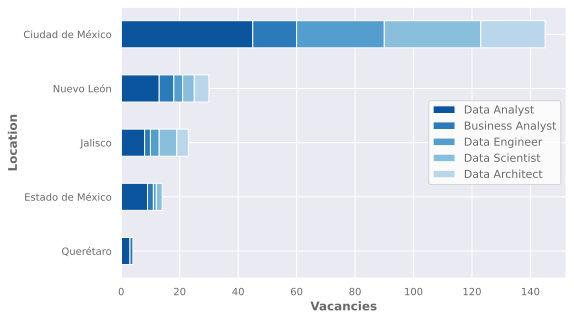

In [56]:
# Bar plot of Jobs by State with Matplotlib

# Stack bar chart of Data jobs per State
jobs_per_location_bar_plot_df.plot.barh(stacked=True, 
                                y = ['Data Analyst',	'Business Analyst',	'Data Engineer',
                                    'Data Scientist', 'Data Architect'], 
                                color=sns.color_palette('Blues_r'),
                                figsize=(8, 5) )
plt.legend(facecolor = 'white', loc = 'center right')
plt.xlabel('Vacancies', weight = 'bold')
plt.ylabel('Location', weight = 'bold')
plt.show()

In [100]:
# Bar plot of Jobs by State with Plotly
fig = px.bar(jobs_per_location_bar_plot_df, x=['Business Analyst',	'Data Analyst',	
                                        'Data Architect',	'Data Engineer',	'Data Scientist'], 
            y=jobs_per_location_bar_plot_df.index,
            color_discrete_sequence=px.colors.sequential.Blues_r,
            height = 500,
            width = 800,
            title = 'Demand Per Data Job Category In the Most Important States',
            labels = {"value": "Vacancies", "variable": "Data Job Category"},
            barmode='stack'#'group'
            )
fig.update_layout(title_x=0.5, font=dict(size=14, color = 'dimgray'))
fig.show(config=config)

To draw the heatmaps, a new dataframe was built using the previous dataframe joined with the dataframe with the states data. This, with the purpose to draw the heapmap with all the states from Mexico, and not only with those with current vacancies. 

In [58]:
# Building Dataframe for Heatmap
jobs_per_location_heatmap_df = (jobs_per_location_df.join(states_df, how = 'outer').fillna(0)
                                .drop(columns = ['Total','ID', 'Lat', 'Long'])
                                )
jobs_per_location_heatmap_df.head()

,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist
Aguascalientes,0.0,0.0,0.0,1.0,0.0
Baja California,0.0,1.0,0.0,1.0,0.0
Baja California Sur,0.0,0.0,0.0,0.0,0.0
Campeche,0.0,0.0,0.0,0.0,0.0
Chiapas,0.0,1.0,0.0,0.0,0.0


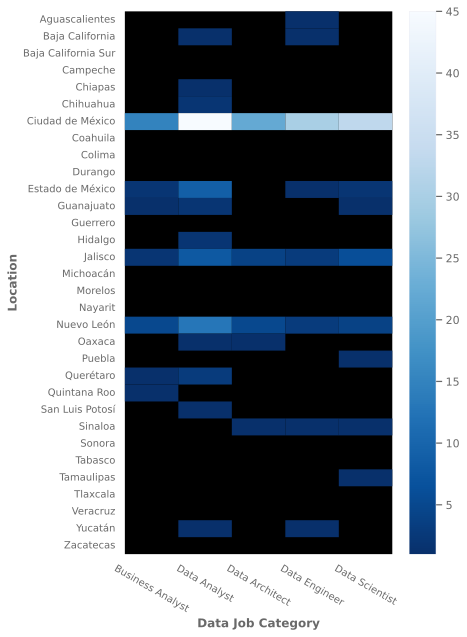

In [84]:
# Heatmap of Data Jobs per State with Matplotlib
plt.figure(figsize = (6,10))
ax = sns.heatmap(jobs_per_location_heatmap_df, 
            cmap = "Blues_r",
            mask = (jobs_per_location_heatmap_df == 0))
ax.set_facecolor('black')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
plt.xlabel('Data Job Category')
plt.ylabel('Location')
plt.xticks(rotation = 330)
plt.show()

Heatmaps with Plotly require the dataset to be in a tidy (or long) form. So, the data was transformed once again using the method *melt* from pandas.

In [98]:
# Converting the Dataset into tidy data
jobs_per_location_heatmap_tidy_df = pd.melt(jobs_per_location_heatmap_df.reset_index().rename(columns = {'index': 'Location'}), 
                                            id_vars= 'Location', var_name = 'Job', value_name = 'Vacancies').\
                                    sort_values(by = 'Location', ascending = False)
jobs_per_location_heatmap_tidy_df.head(10)

,Location,Job,Vacancies
159,Zacatecas,Data Scientist,0.0
63,Zacatecas,Data Analyst,0.0
95,Zacatecas,Data Architect,0.0
127,Zacatecas,Data Engineer,0.0
31,Zacatecas,Business Analyst,0.0
30,Yucatán,Business Analyst,0.0
158,Yucatán,Data Scientist,0.0
94,Yucatán,Data Architect,0.0
126,Yucatán,Data Engineer,1.0
62,Yucatán,Data Analyst,1.0


In [99]:
# Heatmap of Data Jobs per State with Plotly

# Heatmap with Plotly
fig = px.density_heatmap(jobs_per_location_heatmap_tidy_df, y='Location', 
                          x = 'Job', z = 'Vacancies',
                          color_continuous_scale= heatmap_px_colorscale,
                          #color_continuous_scale="Blues_r",
                          height=800,
                          width=700, 
                          title= 'Demand Per Location & Data Job Category',
                          labels={"Job": "Data Job Category"},
                          )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Vacancies"), 
                  font=dict(size=13, color = 'dimgray'))
fig.update_xaxes(categoryorder='array', categoryarray= ['Business Analyst', 'Data Analyst', 
                                                        'Data Architect', 'Data Engineer', 'Data Scientist'])
fig.show(config=config)

From the plots above, it is possible to observe that, undoubtedly, **Mexico City**, **Nuevo León**, **Jalisco**, and **Estado de México** are the locations where most of the data jobs are demanded, while the rest of the country is lagging behind in terms of data jobs creation.

However, it is important to remark that the data jobs demand is largely concentrated in **Mexico City**, whereas **Nuevo León**, **Jalisco**, and **Estado de México** are distant second, third and fourth places, respectively.

Moreover, it is noteworthy that the **Data Analyst** position is the one most demanded across the Mexican States; whereas **Data Architect** is the less demanded.

#### **What are the Companies Demanding More Data Jobs?**

To answer this question, a treemap was drawn.

So, first, a new dataframe was created using the *groupby* function from pandas. Then, the vacancies with *Not Disclosed* positions were removed. After that, the datarame was sliced to get only the top 15 companies demanding data jobs.

Finally, the labels for the treemap were also sliced to shorten them.

In [62]:
# Building the Dataframe with the top 15 companies demanding data jobs
top_treemap = 15
company_treemap_df = (df.groupby(by = 'Company', as_index= False)['Job'].count()
                      .sort_values(by = 'Job', ascending = False)
                      .rename(columns = {'Job': 'Vacancies'})[:top_treemap]
                      .set_index('Company').drop('Not Disclosed').reset_index()
                      )
company_treemap_df['Company'] = company_treemap_df['Company'].apply(lambda x: x[:16])

company_treemap_df.head()

,Company,Vacancies
0,"Manpower, S.A. D",10
1,Softtek,6
2,Atento Servicios,6
3,Praxis,6
4,Bairesdev Llc /,5


In [63]:
# Treemap with Plotly
fig = px.treemap(company_treemap_df, path = [px.Constant("."), 'Company'], values='Vacancies', color = 'Vacancies', 
                                  color_continuous_scale=px.colors.sequential.Blues,
                                  title= f'Top {top_treemap} Companies Demanding Data Jobs',
                                  height= 600,
                                  width = 1000
                                 )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Vacancies"), font=dict(size=14))
fig.show(config=config)

From the plot above, it is clear that **Manpower**, **Atento Servicios**, **Praxis** and **Softek** are the companies with **the highest data jobs demand** at the moment of the present study. So, even though, the data jobs demand may vary along time, the current interest of such companies in data science and analytics might convert them in interesting prospects for job seekers.

It is also noteworthy that most of the top companies demanding data jobs are recruitment agencies and tech consultancy firms, with the notable exception of BBVA Bancomer, Liverpool and HP.

#### **How is the Data Jobs Demand Per Company?**

To answer this question, a heatmap was drawn in order to show what data jobs categories are demanded by company.

As usual, a dataframe with the data for top 30 companies demanding data jobs was prepared.

Of course, the vacancies without a disclosed company were removed from the dataset.

In [77]:
# Dataframe for Heatmap with top 30 companies demanding data jobs
top_companies = 30
company_heatmap_df = (pd.pivot_table(data = df, index = 'Company', columns = 'Job', 
                                     values = 'Location', aggfunc = 'count')
                      .fillna(0).reset_index())
company_heatmap_df['Total'] = company_heatmap_df.sum(axis=1, numeric_only= True)
company_heatmap_df = (company_heatmap_df.sort_values('Total', ascending = False)
                      .set_index('Company').drop('Not Disclosed')[:top_companies]
                      .drop(columns = 'Total').sort_values('Company', ascending = True)
                      )
company_heatmap_df.head()

Job,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist
Company,,,,,
"Accenture, S.C.",0.0,1.0,0.0,1.0,0.0
Alcon,0.0,2.0,0.0,0.0,0.0
Alta Rentabilidad Sa D...,0.0,3.0,0.0,0.0,0.0
"Atento Servicios, S. A...",0.0,6.0,0.0,0.0,0.0
Bairesdev,0.0,1.0,1.0,1.0,0.0


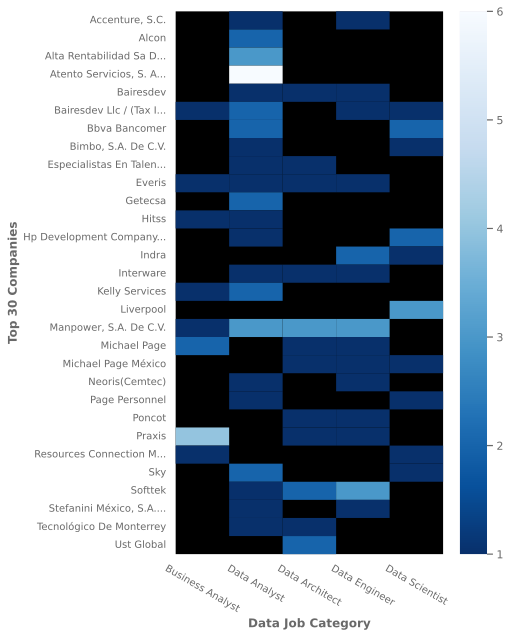

In [83]:
# Heatmap with Matplotlib
plt.figure(figsize = (6,10))
formatter = mpl.ticker.StrMethodFormatter('{x:,.0f}')
ax = sns.heatmap(company_heatmap_df, 
            cmap = "Blues_r",
            mask = (company_heatmap_df == 0),
            cbar_kws={"format": formatter})
ax.set_facecolor('black')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
plt.xlabel('Data Job Category')
plt.ylabel(f'Top {top_companies} Companies')
plt.xticks(rotation = 330)
plt.show()

Likewise, as heatmaps with Plotly require the dataset to be in a tidy (or long) form. The data was transformed once again using the method *melt* from pandas.

In [88]:
# Dataframe for Heatmap with top 30 companies demanding data jobs in tidy format
company_heatmap_tidy_df = pd.melt(company_heatmap_df.reset_index().sort_values('Company', ascending = False), 
                                  id_vars = 'Company', var_name = 'Job', value_name = 'Vacancies')
company_heatmap_tidy_df.head()

,Company,Job,Vacancies
0,Ust Global,Business Analyst,0.0
1,Tecnológico De Monterrey,Business Analyst,0.0
2,"Stefanini México, S.A....",Business Analyst,0.0
3,Softtek,Business Analyst,0.0
4,Sky,Business Analyst,0.0


In [95]:
# Heatmap with Plotly
fig = px.density_heatmap(company_heatmap_tidy_df, y='Company', 
                          x = 'Job', z = 'Vacancies',
                          color_continuous_scale= heatmap_px_colorscale,
                          height=800,
                          width=750, 
                          title= f'Demand Per Company & Data Job Category (Top {top})',
                          labels={"Job": "Data Job Category"},
                          )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Vacancies"), 
                  font=dict(size=13, color = 'dimgray'))
fig.show(config=config)

From the plots above, it is possible to see that, indeed, **Data Analyst**, **Data Engineer** and **Data Scientist** positions are the ones **most demanded** by the companies in Mexico at the moment of this study; whereas **Data Architect** and **Business Analyst** positions are the **less demanded**.

Notwithstanding with the above, the heatmap suggests that **Business Analyst** and **Data Engineer** positions are more demanded across different organizations. On the contrary, **Data Scientist** and, certainly, **Data Architect** vacancies can be found in more specific organizations like tech consulting companies.

#### **Where Do the Companies Demanding Data Jobs Locate?**